# Text Summarization using the TextRank Algorithm 

Text Summarization is one of those applications of Natural Language Processing (NLP) which is bound to have a huge impact on our lives. With growing digital media and ever growing publishing – who has the time to go through entire articles / documents / books to decide whether they are useful or not? Thankfully – this technology is already here.

Text summarization can broadly be divided into two categories — Extractive Summarization and Abstractive Summarization.

**Extractive Summarization**: These methods rely on extracting several parts, such as phrases and sentences, from a piece of text and stack them together to create a summary. Therefore, identifying the right sentences for summarization is of utmost importance in an extractive method.\

**Abstractive Summarization**: These methods use advanced NLP techniques to generate an entirely new summary. Some parts of this summary may not even appear in the original text.

In this Project, we will be focusing on the extractive summarization technique.

**TextRank is an extractive and unsupervised text summarization technique. Let’s take a look at the flow of the TextRank algorithm that we will be following:**

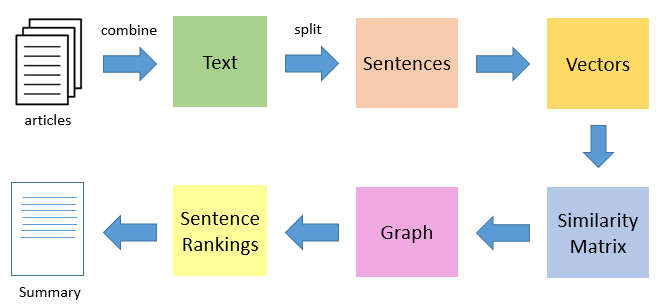

 - The first step would be to concatenate all the text contained in the articles
 - Then split the text into individual sentences
 - In the next step, we will find vector representation (word embeddings) for each and every sentence
 - Similarities between sentence vectors are then calculated and stored in a matrix
 - The similarity matrix is then converted into a graph, with sentences as vertices and similarity scores as edges, for sentence rank calculation
 - Finally, a certain number of top-ranked sentences form the final summary

In [111]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt') # one time execution
import re
from nltk.tokenize import sent_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.metrics.pairwise import cosine_similarity

stop_words = stopwords.words('english')
import networkx as nx
pd.set_option('display.max_colwidth', -1)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ramya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\ramya\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [91]:
df = pd.read_csv("tennis_articles.csv",engine='python')

#ref https://www.analyticsvidhya.com/blog/2018/11/introduction-text-summarization-textrank-python/

# https://medium.com/analytics-vidhya/sentence-extraction-using-textrank-algorithm-7f5c8fd568cd
# #ref https://www.youtube.com/watch?v=P8Kt6Abq_rM&ab_channel=GlobalSoftwareSupport


In [92]:
df.head()

,article_id,article_title,article_text,source
0,1,"I do not have friends in tennis, says Maria Sh...",Maria Sharapova has basically no friends as te...,https://www.tennisworldusa.org/tennis/news/Mar...
1,2,Federer defeats Medvedev to advance to 14th Sw...,"BASEL, Switzerland (AP) — Roger Federer advanc...",http://www.tennis.com/pro-game/2018/10/copil-s...
2,3,Tennis: Roger Federer ignored deadline set by ...,Roger Federer has revealed that organisers of ...,https://scroll.in/field/899938/tennis-roger-fe...
3,4,Nishikori to face off against Anderson in Vien...,Kei Nishikori will try to end his long losing ...,http://www.tennis.com/pro-game/2018/10/nishiko...
4,5,Roger Federer has made this huge change to ten...,"Federer, 37, first broke through on tour over ...",https://www.express.co.uk/sport/tennis/1036101...


In [93]:
df.article_text[0]

"Maria Sharapova has basically no friends as tennis players on the WTA Tour. The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much. I think everyone knows this is my job here. When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net. So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match. I'm a pretty competitive girl. I say my hellos, but I'm not sending any players flowers as well. Uhm, I'm not really friendly or close to many players. I have not a lot of friends away from the courts.' When she said she is not really close to a lot of players, is that something strategic that she is doing? Is it different on the men's tour than the women's tour? 'No, not at all. I think just because you're in the same

In [94]:
print (df.article_title[0])

I do not have friends in tennis, says Maria Sharapova


Now we have 2 options – we can either summarize each article individually, or we can generate a single summary for all the articles. For our purpose, we will go ahead with the summary of one article at a time.

In [95]:
df["token_sent_without_preprocess"]=df["article_text"].apply(sent_tokenize)

In [96]:
df["article_text"][0]

"Maria Sharapova has basically no friends as tennis players on the WTA Tour. The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much. I think everyone knows this is my job here. When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net. So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match. I'm a pretty competitive girl. I say my hellos, but I'm not sending any players flowers as well. Uhm, I'm not really friendly or close to many players. I have not a lot of friends away from the courts.' When she said she is not really close to a lot of players, is that something strategic that she is doing? Is it different on the men's tour than the women's tour? 'No, not at all. I think just because you're in the same

In [97]:
df.token_sent_without_preprocess[0]

['Maria Sharapova has basically no friends as tennis players on the WTA Tour.',
 "The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much.",
 'I think everyone knows this is my job here.',
 "When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.",
 "So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match.",
 "I'm a pretty competitive girl.",
 "I say my hellos, but I'm not sending any players flowers as well.",
 "Uhm, I'm not really friendly or close to many players.",
 "I have not a lot of friends away from the courts.'",
 'When she said she is not really close to a lot of players, is that something strategic that she is doing?',
 "Is it different on the men's tour than the women's tour?",
 "'No, not at

### Extracting Embeddings

In [61]:
# Extract word vectors
word_embeddings = {}
f = open('C:/Users/ramya/Desktop/Santa Clara University/Projects/glove.6B/glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

### Preprocessing

In [98]:
def preprocess(token_sent):
    sentence=[]
    for sent in token_sent:
        lower_sent= re.sub('[^A-Za-z]+', ' ', sent).lower()
        lower_sent_withoutstop=[]
        for word in lower_sent.split(" "):
            
            if word not in stop_words and len(word)>2:
                lower_sent_withoutstop.append(word)
        sentence.append(" ".join(lower_sent_withoutstop))
                
    return list(filter(lambda x : len(x)>2,sentence))

In [99]:
df["token_sent"]=df["token_sent_without_preprocess"].apply(preprocess)

In [100]:
df["token_sent"][0]

['maria sharapova basically friends tennis players wta tour',
 'russian player problems openly speaking recent interview said really hide feelings much',
 'think everyone knows job',
 'courts court playing competitor want beat every single person whether locker room across net',
 'one strike conversation weather know next minutes try win tennis match',
 'pretty competitive girl',
 'say hellos sending players flowers well',
 'uhm really friendly close many players',
 'lot friends away courts',
 'said really close lot players something strategic',
 'different men tour women tour',
 'think sport mean friends everyone categorized tennis player going get along tennis players',
 'think every person different interests',
 'friends completely different jobs interests met different parts life',
 'think everyone thinks tennis players greatest friends',
 'ultimately tennis small part',
 'many things interested',
 'also read maria sharapova reveals tennis keeps motivated']

### Creating Vectors for sentences

Now, let’s create vectors for our sentences. We will first fetch vectors (each of size 100 elements) for the constituent words in a sentence and then take mean/average of those vectors to arrive at a consolidated vector for the sentence.

In [101]:
def vec(s):
    return word_embeddings.get(s, np.zeros((100,)))

In [102]:
def meanv_sent(coords):
    # assumes every item in coords has same length as item 0
    a=0
    running_sum=0
    for w in coords.split():
        if w.lower() in word_embeddings.keys():
            a=a+1
            running_sum=running_sum+vec(w.lower())
        
    return (running_sum/max(a,1))

### Similarity Matrix Preparation

The next step is to find similarities between the sentences, and we will use the cosine similarity approach for this challenge. Let’s create an empty similarity matrix for this task and populate it with cosine similarities of the sentences.

Let’s first define a zero matrix of dimensions (n * n).  We will initialize this matrix with cosine similarity scores of the sentences. Here, n is the number of sentences in first article here. And then same approach for all articles

In [103]:
def finding_sim_mat(token_sent):
    k=len(token_sent)
    sim_mat = np.zeros([k, k])
    for i in range(k):
        for j in range(k):
            if i != j:
                sim_mat[i][j]= (cosine_similarity(meanv_sent(token_sent[i]).reshape(1,100), \
                                                meanv_sent(token_sent[j]).reshape(1,100))[0][0])
    return sim_mat

In [104]:
df["similarity_matrix"]=df["token_sent"].apply(finding_sim_mat)

### Applying TextRank Algorithm which is similar to PageRank Algorithm


Before proceeding further, let’s convert the similarity matrix sim_mat into a graph. The nodes of this graph will represent the sentences and the edges will represent the similarity scores between the sentences. On this graph, we will apply the PageRank algorithm to arrive at the sentence rankings.

In [105]:
# ref- https://towardsdatascience.com/textrank-for-keyword-extraction-by-python-c0bae21bcec0

def scores_from_matrix_and_top_n_indexes(row):
    review=[]
    nx_graph = nx.from_numpy_array(row["similarity_matrix"])
    scores = nx.pagerank(nx_graph)
    scores= list(scores.values())
    # Extract top 10 sentences as the summary
    ranked_sentences = list(np.argsort(scores)[::-1][:10])
    for i in range(len(ranked_sentences)):
        review.append(row["token_sent_without_preprocess"][i])
        
    
    return review    

In [106]:
df["summarized_text"]=df.apply(scores_from_matrix_and_top_n_indexes,axis=1)

In [112]:
df[["token_sent_without_preprocess","summarized_text"]].iloc[0]

token_sent_without_preprocess    [Maria Sharapova has basically no friends as tennis players on the WTA Tour., The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much., I think everyone knows this is my job here., When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net., So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match., I'm a pretty competitive girl., I say my hellos, but I'm not sending any players flowers as well., Uhm, I'm not really friendly or close to many players., I have not a lot of friends away from the courts.', When she said she is not really close to a lot of players, is that something strategic that she is doing?, Is it different on the men's tour than the women's tour?, 'No, not at 